In [53]:
library(magrittr)
library(tidyverse)
library(Cairo)  
library(stringr)
library(rasilabRtemplates)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#000000", "#E69F00", "#56B4E9", 
            "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

### Figure 3A

In [66]:
data <- read_tsv('../data/plate_reader/3a_data.tsv')
annotations <- read_csv('../data/plate_reader/3a_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04) %>%
  subset(medium == '.025%glucose_noser')

plot_data <- processed_data %>% 
  # control order of variables
  mutate(genotype = factor(genotype, levels=c("WT","sdaCB","sdaB","sdaC")))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


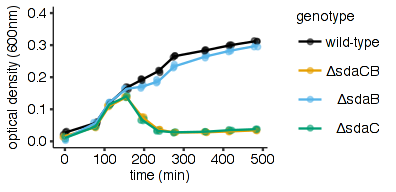

In [67]:
# plot
plot.width = 3.3
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(plot_data, aes(x=time, y=od, col=genotype)) + 
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) +
scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaCB")), 
                            expression(italic("ΔsdaB")), expression(italic("ΔsdaC")))) + 
scale_y_continuous(limits=c(0,0.4)) +
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_3a.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)
ggsave('../png/fig_3a.png', dpi=300, width = plot.width, height = plot.height)

### Figure 3B

In [56]:
data <- read_tsv('../data/plate_reader/3b_data.tsv')
annotations <- read_csv('../data/plate_reader/3b_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04) %>%
  subset(genotype != 'gcvP_sdaC')

plot_data <- processed_data %>% 
  # control order of variables
  mutate(genotype = factor(genotype, levels=c("WT", "sdaCB","sdaC"))) %>%
  mutate(plasmid = factor(plasmid, levels=c('sdaC','sdaB','vector','sdaB_native','none'),
                         labels=c('sdaC','sdaB-high','vector','sdaB-native','none'))) %>%
  subset(genotype != 'sdaC')

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  plasmid = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

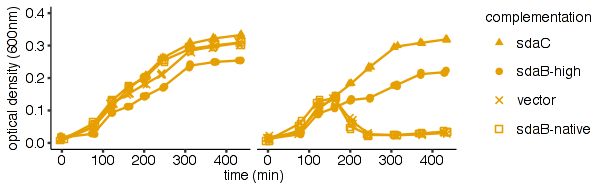

In [57]:
# plot
plot.width = 5
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=od, shape=plasmid)) +
geom_point(size=1.5, position = position_jitter(w = 5, h = 0), col="#E69F00") + 
facet_wrap(~genotype) + scale_shape_manual(values=c(17,16,4,0)) + 
scale_y_continuous(limits=c(0,0.4)) +
labs(x = "time (min)", y = "optical density (600nm)", shape = "complementation") +
theme(strip.background = element_blank(), strip.text.x = element_blank()) +
stat_summary(aes(group=plasmid), fun.y=mean, geom="line", col="#E69F00")

ggsave('../pdf/fig_3b_orange.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

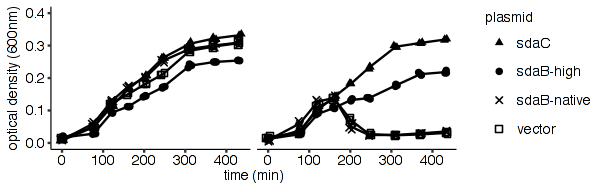

In [58]:
plot_data <- plot_data %>%
  #subset(plasmid != 'sdaB-high') %>%
  mutate(plasmid=factor(plasmid, levels=c('sdaC','sdaB-high','sdaB-native','vector')))

options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=od, shape=plasmid)) +
geom_point(size=1.5, position = position_jitter(w = 5, h = 0)) + 
facet_wrap(~genotype) + scale_shape_manual(values=c(17,16,0,4)) + 
scale_y_continuous(limits=c(0,0.4)) +
labs(x = "time (min)", y = "optical density (600nm)", shape = "plasmid") +
theme(strip.background = element_blank(), strip.text.x = element_blank()) +
stat_summary(aes(group=plasmid), fun.y=mean, geom="line")

ggsave('../png/fig_3b.png', dpi=300, width = plot.width, height = plot.height)
ggsave('../pdf/fig_3b.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Figure 3C-D

In [59]:
data <- read_tsv('../data/plate_reader/3cd_data.tsv')
annotations <- read_csv('../data/plate_reader/3cd_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04)

plot_data <- processed_data %>%
  mutate(genotype = factor(genotype, levels=c("WT","sdaCB","sdaC","sdaB",
                                              "serA","serA_sdaCB","serA_sdaB","serA_sdaC"))) %>%
  mutate(plasmid = factor(plasmid, levels=c("vector","sdaC","sdaB-native","none")))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  plasmid = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

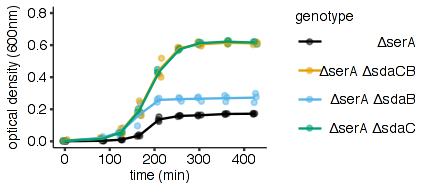

In [60]:
# subset data for Fig 3C
subset = plot_data %>%
  subset(plasmid == 'none') %>%
  filter(str_detect(genotype, "serA"))

# plot
plot.width = 3.6
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(subset, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_y_continuous(limits=c(0,0.8)) + scale_color_manual(values=cbPalette, 
                   labels=c(expression(italic("ΔserA")), expression(italic("ΔserA ΔsdaCB")),
                           expression(italic("ΔserA ΔsdaB")), expression(italic("ΔserA ΔsdaC")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_3c.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)
ggsave('../png/fig_3c.png', dpi=300, width = plot.width, height = plot.height)

Warning message:
“Removed 5 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

Warning message:
“Removed 5 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

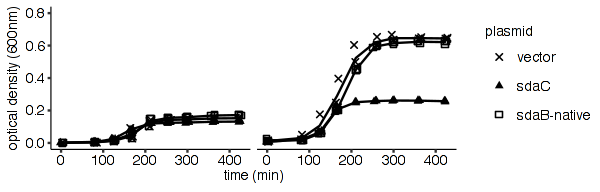

In [61]:
# subset data for Fig 3D
subset = plot_data %>%
  subset(plasmid != 'none' & genotype != 'serA_sdaB')

# plot
plot.width = 5
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(subset, aes(x=time, y=od, shape=plasmid)) +
facet_wrap(~genotype) +
geom_point(size=1.5, position = position_jitter(w = 5, h = 0)) + 
scale_shape_manual(values=c(4,17,0)) +
scale_y_continuous(limits=c(0,0.8)) + scale_color_manual(values=cbPalette, 
                   labels=c("vector", "sdaC", "sdaB-native")) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "complementation") +
theme(strip.background = element_blank(), strip.text.x = element_blank()) +
stat_summary(aes(group=plasmid), fun.y=mean, geom="line", size = 0.5)

ggsave('../pdf/fig_3d.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)
ggsave('../png/fig_3d.png', dpi=300, width = plot.width, height = plot.height)

### Supp Figure 3B

In [62]:
data <- read_tsv('../data/plate_reader/supp_data_3b.tsv')
annotations <- read_csv('../data/plate_reader/supp_ann_3b.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>%
  mutate(od = od - 0.04) %>%
  mutate(genotype = factor(genotype, levels=c('WT','sdaCB','sdaCB_sdaA_tdcG',
                                             'sdaB_tdcG_sdaA','sdaB_tdcG')))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


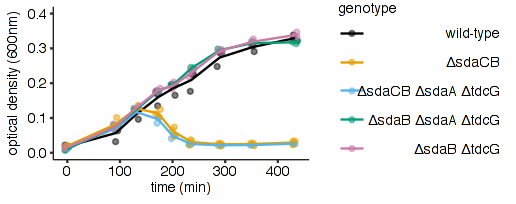

In [63]:
# plot 
plot.width = 4.3
plot.height = 1.7
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(processed_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_y_continuous(limits=c(0,0.4)) +
scale_colour_manual(values=cbPalette,labels=c("wild-type", expression(italic("ΔsdaCB")), 
                            expression(italic("ΔsdaCB ΔsdaA ΔtdcG")),
                            expression(italic("ΔsdaB ΔsdaA ΔtdcG")),
                            expression(italic("ΔsdaB ΔtdcG")))) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line") +
labs(x = "time (min)", y = "optical density (600nm)")

ggsave('../pdf/supp_3b.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Supp Figure 3C

In [64]:
data <- read_tsv('../data/plate_reader/supp_data_3c.tsv')
annotations <- read_csv('../data/plate_reader/supp_ann_3c.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04) %>%
  subset(plasmid %in% c('sdaC','sdaC_E83X')) %>%
  subset(genotype != 'sdaC')

plot_data <- processed_data %>% 
  mutate(genotype = factor(genotype, levels=c('WT', 'sdaCB'))) %>%
  mutate(plasmid = factor(plasmid, levels=c('sdaC','sdaC_E83X'),
                         labels=c('sdaC','sdaC-E83X')))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  plasmid = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


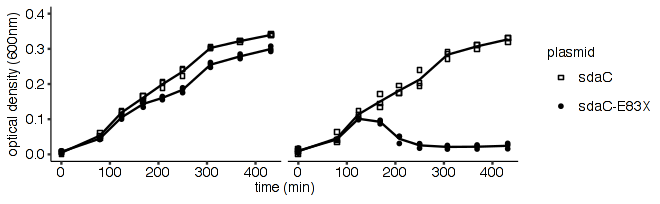

In [65]:
plot.width = 5.5
plot.height = 1.7
options(repr.plot.width=plot.width, repr.plot.height=plot.height)

ggplot(plot_data, aes(x=time, y=od, shape=plasmid)) +
geom_point(size=1) + facet_wrap(~genotype) +
scale_shape_manual(values=c(0,16,4,17)) + 
scale_y_continuous(limits=c(0,0.4)) +
labs(x = "time (min)", y = "optical density (600nm)", col = "plasmid") +
theme(strip.background = element_blank(), strip.text.x = element_blank()) +
stat_summary(aes(group=plasmid), fun.y=mean, geom="line")

ggsave('../pdf/supp_3c.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)